INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple de suivi multiobjets

In [1]:
import cv2  
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scipy.optimize as sci

Fonction pour calculer la similarité entre 2 histogrammes.

In [2]:
def CompareHisto(hist1, hist2):
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)

Fonction qui calcule l'histogramme d'une image à l'intérieur d'un rectangle englobant.

In [3]:
def CalcHisto(image, bbox):
    roi = (bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3])
    mask = np.zeros((image.shape[0],image.shape[1]), np.uint8)
    cv2.rectangle(mask,(roi[0],roi[1]),(roi[2],roi[3]),255,-1,8,0);
    return cv2.calcHist([image1],[0],mask,[64],[0,256])

Lecture de deux images tests et affichage.

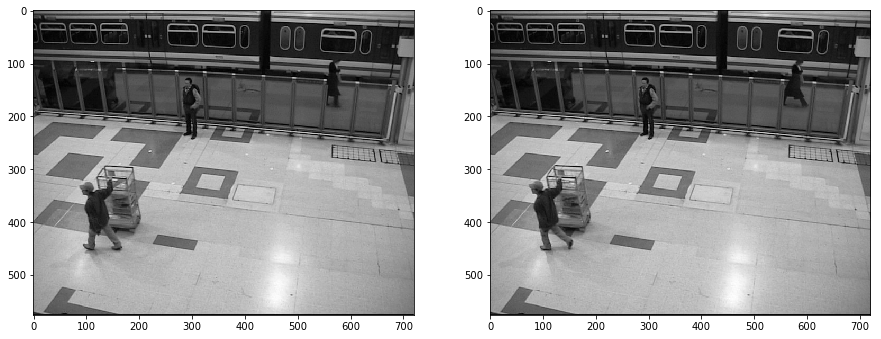

In [4]:
image1 = cv2.imread('in000216.jpg',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('in000219.jpg',cv2.IMREAD_GRAYSCALE) 
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(image1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(image2,cmap = plt.get_cmap('gray'))
plt.show()

Définition des rectangles englobants (bboxes) des régions d'intérêt (ROIs).

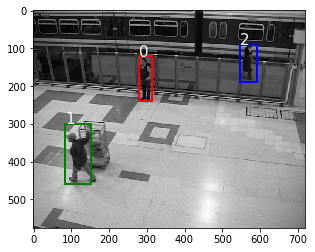

In [5]:
bboxes1 = [(279, 120, 36, 120)]
bboxes1.append((83, 300, 70, 160))
bboxes1.append((547, 90, 45, 100))
fig,ax = plt.subplots(1)
ax.imshow(image1,cmap = plt.get_cmap('gray'))
bboxcolor ='rgbcmy'
i = 0
for bbox in bboxes1:
    rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2, edgecolor = bboxcolor[i], facecolor='none')
    ax.add_patch(rect)
    ax.text(bbox[0], bbox[1], i, color='white', fontsize=15)
    i = i+1
plt.show()

Détection des objets d'intérêt dans la trame suivante. On simule une fausse détection. 

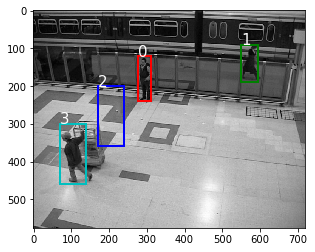

In [6]:
bboxes2 = [(276, 120, 36, 120)]
bboxes2.append((550, 90, 45, 100))
bboxes2.append((170, 200, 70, 160))  #fausse détection
bboxes2.append((70, 300, 70, 160))
fig,ax = plt.subplots(1)
ax.imshow(image2,cmap = plt.get_cmap('gray'))
bboxcolor ='rgbcmy'
i = 0
for bbox in bboxes2:
    rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2, edgecolor = bboxcolor[i], facecolor='none')
    ax.add_patch(rect)
    ax.text(bbox[0], bbox[1], i, color='white', fontsize=15)
    i = i+1
plt.show()

Calcul des coûts d'association entre les bboxes des deux trames.

In [7]:
matriceCout = np.zeros((len(bboxes1),len(bboxes2)))
for i in range(0,len(bboxes1)):
    a = CalcHisto(image1,bboxes1[i])
    for j in range(0,len(bboxes2)):
        b =CalcHisto(image2,bboxes2[j])
        matriceCout[i,j] = CompareHisto(a,b)
print(matriceCout)

[[0.03393659 0.14289801 0.69278595 0.55810468]
 [0.49070809 0.51083768 0.38368923 0.11543583]
 [0.14070053 0.04365319 0.70498242 0.58069033]]


On applique l'algorithme Hongrois (Hungarian algorithm) pour trouver la meilleure association des bboxes.

In [8]:
row_ind, col_ind = sci.linear_sum_assignment(matriceCout)
print(row_ind)
print(col_ind)

[0 1 2]
[0 3 1]
